In [8]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

from src import support_base_de_datos as sup_bd


### Comparar precios promedio de productos similares (categoría, subcategoría y cantidad) entre supermercados.

In [9]:
conex, cur = sup_bd.obtener_conexion_bd()

query = """
SELECT 
    p.categoria,
    p.subcategoria,
    p.nombre,
    p.cantidad,
    p.unidad,
    p.supermercado,
    AVG(h.precio) AS precio_promedio
FROM 
    productos AS p
JOIN 
    historicos AS h ON p.id = h.id_producto
GROUP BY 
    p.categoria,
    p.subcategoria,
    p.nombre,
    p.cantidad,
    p.unidad,
    p.supermercado
ORDER BY 
    p.categoria, 
    p.subcategoria, 
    p.nombre, 
    p.cantidad, 
    precio_promedio DESC;
"""

# Ejecutar la consulta y cargar el resultado en un DataFrame
df_result = pd.read_sql_query(query, conex)

# Cerrar la conexión
conex.close()




C:\Users\JLFA\AppData\Local\Temp\ipykernel_18464\1693301534.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_result = pd.read_sql_query(query, conex)


In [10]:
df_result

,categoria,subcategoria,nombre,cantidad,unidad,supermercado,precio_promedio
0,Aceite Girasol,Aceite Girasol,Abrilsol Aceite Refinado De Girasol Botella,1.0,l,hipercor,1.401413
1,Aceite Girasol,Aceite Girasol,"Aceite Alto Oleico Eroski, Botella",1.0,l,eroski,1.899434
2,Aceite Girasol,Aceite Girasol,Aceite De Girasol Alto Oleico Especial Freidor...,200.0,ml,dia,2.012034
3,Aceite Girasol,Aceite Girasol,"Aceite De Girasol Borgesol, Botella",1.0,l,eroski,2.464151
4,Aceite Girasol,Aceite Girasol,Aceite De Girasol Capicua Garrafa,5.0,l,carrefour,21.525000
...,...,...,...,...,...,...,...
1495,Leche,Sin Lactosa,Puleva Proteína Extra Pro Leche De Vaca Desnat...,1.0,l,alcampo,1.430882
1496,Leche,Sin Lactosa,Puleva Proteína Extra Pro Leche De Vaca Desnat...,1.0,l,alcampo,7.541176
1497,Leche,Sin Lactosa,Unicla Leche Desnatada Sin Lactosa Brik,1.0,l,hipercor,1.350779
1498,Leche,Sin Lactosa,Unicla Leche Semidesnatada Sin Lactosa Brik,1.0,l,hipercor,1.350337


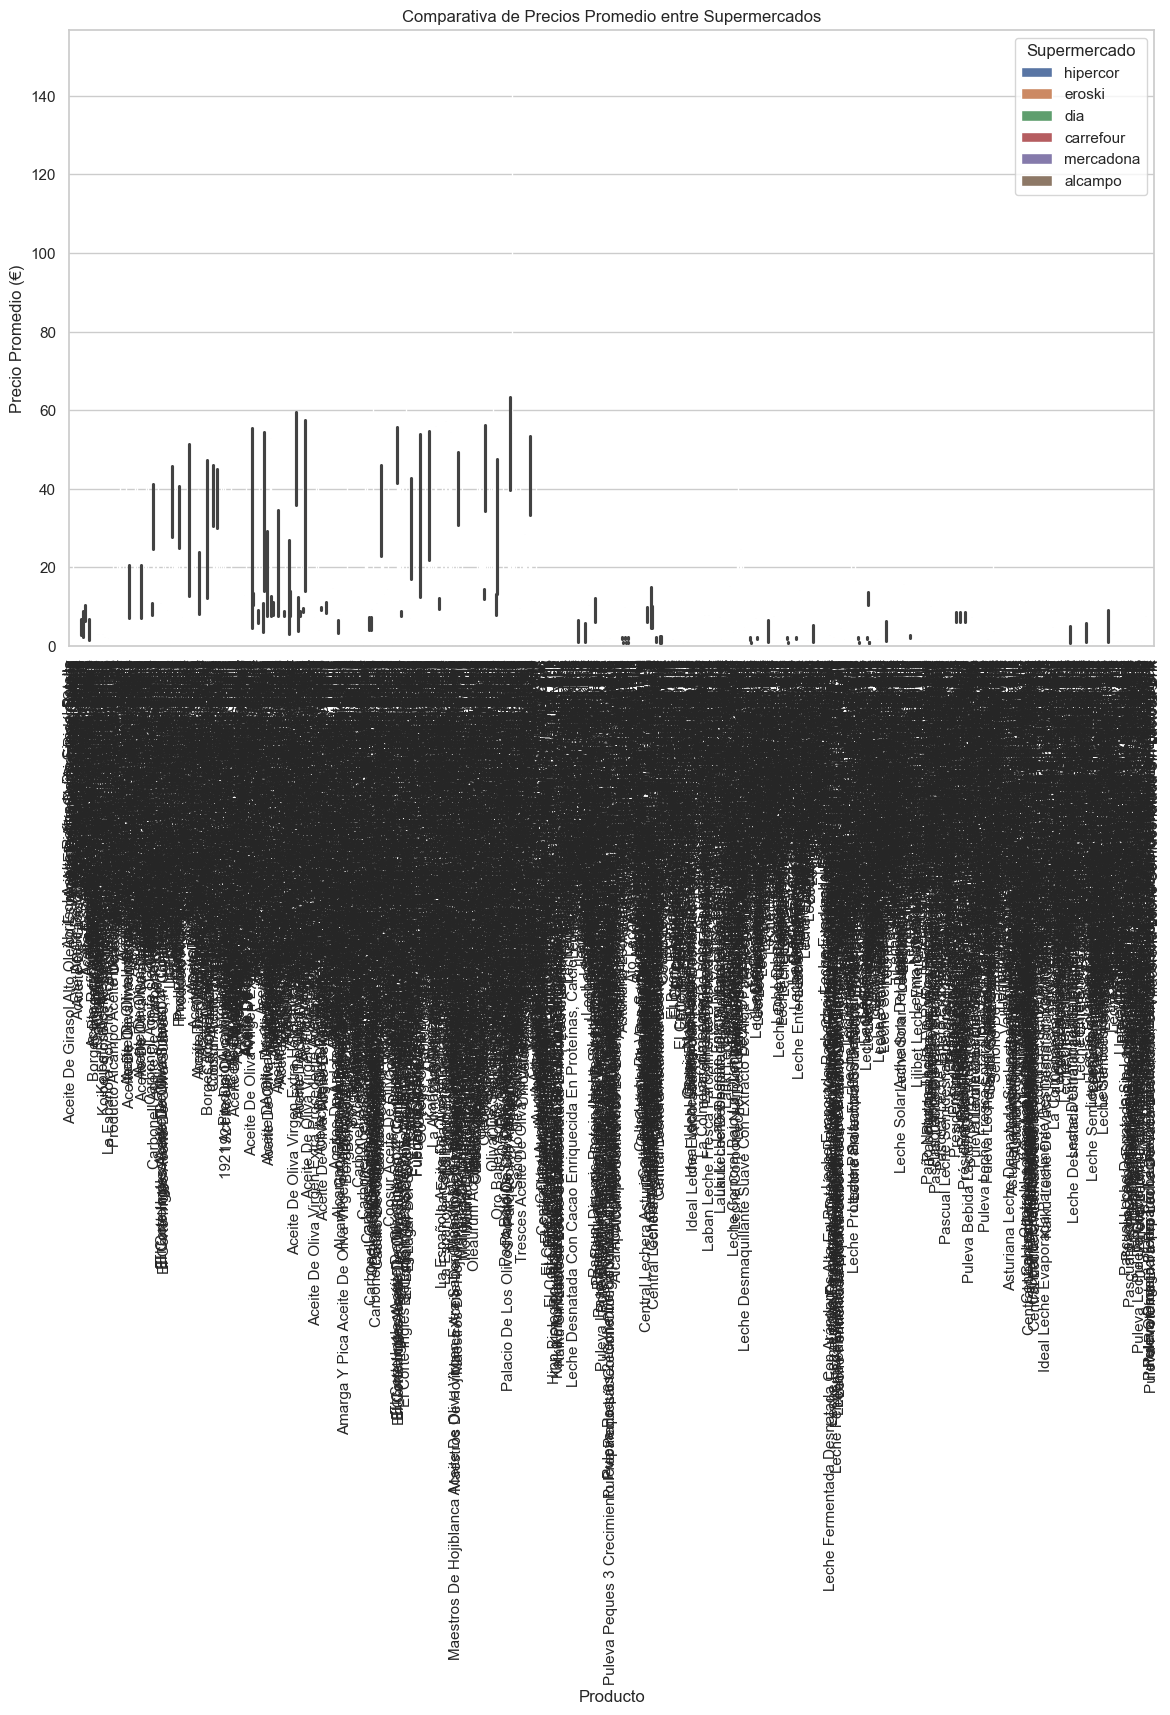

In [7]:

# Configuración básica de Seaborn y Matplotlib
sns.set(style="whitegrid")

# Crear gráfico de barras para comparar precios por supermercado
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_result,
    x='nombre',
    y='precio_promedio',
    hue='supermercado'
)

# Ajustar el título y etiquetas
plt.title('Comparativa de Precios Promedio entre Supermercados')
plt.xlabel('Producto')
plt.ylabel('Precio Promedio (€)')
plt.xticks(rotation=90)
plt.legend(title='Supermercado')
plt.show()


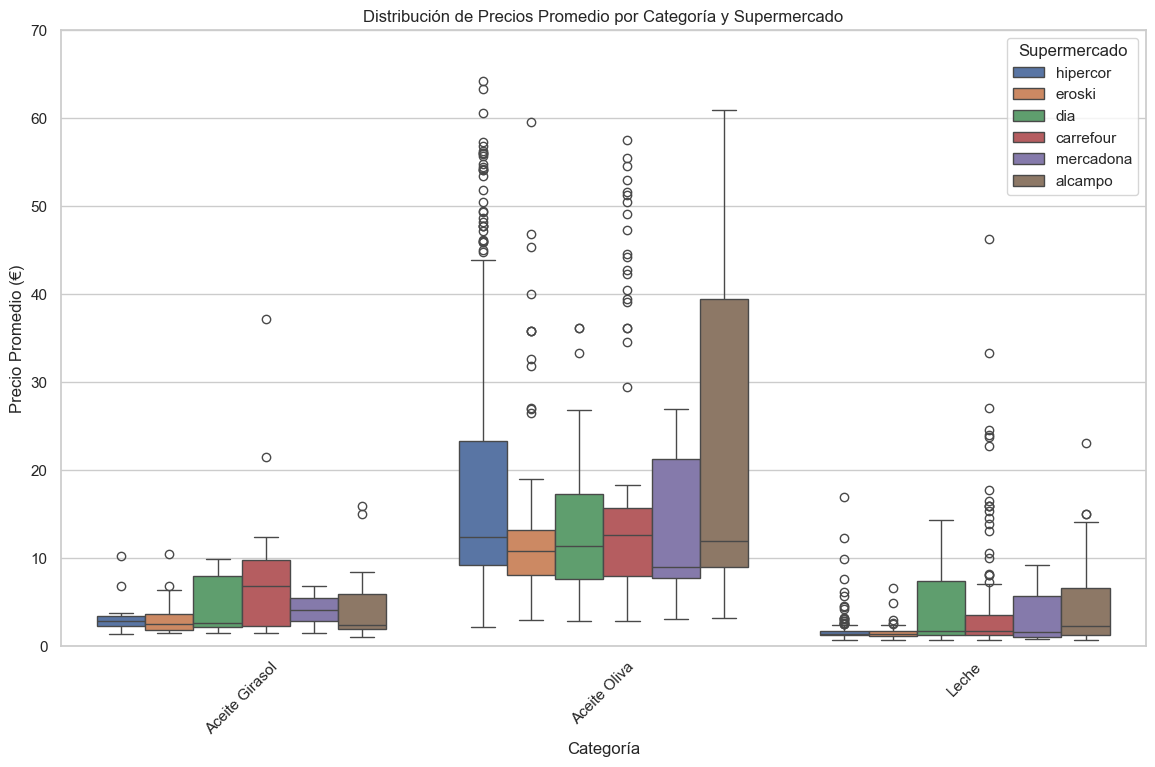

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar para mostrar solo las 10 categorías más comunes (ajusta según prefieras)
top_categories = df_result['categoria'].value_counts().head(10).index
df_filtered = df_result[df_result['categoria'].isin(top_categories)]

# Crear un gráfico de caja para comparar la distribución de precios promedio por categoría y supermercado
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df_filtered,
    x='categoria',
    y='precio_promedio',
    hue='supermercado'
)

# Ajustar el título y etiquetas
plt.title('Distribución de Precios Promedio por Categoría y Supermercado')
plt.xlabel('Categoría')
plt.ylabel('Precio Promedio (€)')
plt.xticks(rotation=45)
plt.ylim((0,70))
plt.legend(title='Supermercado')
plt.show()
